In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
import scipy.stats as stats
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
os.getcwd()
os.listdir()

['.Rhistory',
 'js1_bi.csv',
 'Bipartite_graph.ipynb',
 'Junction_Sequences_NTRK1_nonCRC_4_19_20_deid.xlsx',
 'Table1.rds',
 'nonCRC_Table1.pkl',
 'Fusion_Gene.ipynb',
 'Fusion_Gene_nonCRC.ipynb',
 'Junction_Sequences_CRC_4_19_20_deid.xlsx',
 'js1_count.pkl',
 '.RData',
 'Table1.pkl',
 '.ipynb_checkpoints',
 'Fusion_Gene_R.ipynb',
 'Fusion_Gene_R.R']

# A glance at data

In [140]:
file = 'Junction_Sequences_CRC_4_19_20_deid.xlsx'
df = pd.read_excel(file)
with open('Table1.pkl', 'wb') as f: # save pickle
    pickle.dump(df, f)
    f.close()

In [2]:
with open('Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()
df.head(3)

,deidentifiedSpecimenName,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
0,XRN:6SJTT7,colon adenocarcinoma (crc),MSI-H,RET,TRIM24,chr10:43611914,chr7:138268067,AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTT...,-,-,-
1,XRN:DNF6WD,colon adenocarcinoma (crc),MSS,BRAF,TRIM24,chr7:140489429,chr7:138253092,AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGC...,chr7:140489430,chr7:138253093,AAAAAAAAAAAAAAAAAAGGAGGCCAGGTACGGTGGCTTACGAGTT...
2,XRN:E3F52H,colon adenocarcinoma (crc),MSI ambiguous,RET,NCOA4,chr10:43611796,chr10:51587961,GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCG...,chr10:43607759,chr10:51587699,GCGATGGCACCGGTGGAAACGGGGTCCTGGGGCCCTGCCAGCCTGG...


In [4]:
df.columns

Index(['deidentifiedSpecimenName', 'diseaseOntology', 'MSIstatus', 'gene1_RE',
       'gene2_RE', 'Gene1_Breakpoint1', 'Gene2_Breakpoint1',
       'Junction Sequence 1', 'Gene1_Breakpoint2', 'Gene2_Breakpoint2',
       'Junction Sequence 2'],
      dtype='object')

In [5]:
print(df.shape)
df.head(3)

(245, 11)


,deidentifiedSpecimenName,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
0,XRN:6SJTT7,colon adenocarcinoma (crc),MSI-H,RET,TRIM24,chr10:43611914,chr7:138268067,AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTT...,-,-,-
1,XRN:DNF6WD,colon adenocarcinoma (crc),MSS,BRAF,TRIM24,chr7:140489429,chr7:138253092,AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGC...,chr7:140489430,chr7:138253093,AAAAAAAAAAAAAAAAAAGGAGGCCAGGTACGGTGGCTTACGAGTT...
2,XRN:E3F52H,colon adenocarcinoma (crc),MSI ambiguous,RET,NCOA4,chr10:43611796,chr10:51587961,GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCG...,chr10:43607759,chr10:51587699,GCGATGGCACCGGTGGAAACGGGGTCCTGGGGCCCTGCCAGCCTGG...


In [6]:
print(df.MSIstatus.nunique(), df.MSIstatus.unique())

3 ['MSI-H' 'MSS' 'MSI ambiguous']


In [7]:
df['Junction Sequence 2'].nunique()

94

In [8]:
type(df.MSIstatus)

pandas.core.series.Series

In [9]:
values, counts = np.unique(df.MSIstatus, return_counts=True)
dict(zip(values, counts))

{'MSI ambiguous': 2, 'MSI-H': 92, 'MSS': 151}

In [10]:
counts

array([  2,  92, 151])

In [11]:
df.describe().T.head(3)

,count,unique,top,freq
deidentifiedSpecimenName,245,245,XRN:W5GEWP,1
diseaseOntology,245,2,colon adenocarcinoma (crc),236
MSIstatus,245,3,MSS,151


In [12]:
df.gene2_RE.nunique()

70

In [13]:
df.gene2_RE.unique()

array(['TRIM24', 'NCOA4', 'AGAP3', 'TPM3', 'TPR', 'PLEKHA6', 'LMNA',
       'IRF2BP2', 'TPM1', 'CCDC88C', 'CIT', 'ZNF608', 'POF1B', 'SNRNP70',
       'CCDC6', 'TNIP2', 'NTRK3', 'ETV6', 'EML4', 'SLMAP', 'STRN',
       'DIAPH2', 'GKAP1', 'TARDBP', 'AKAP9', 'CUL1', 'DDX21', 'PAWR',
       'NRBF2', 'ERC1', 'TACC2', 'TNIP1', 'GPHN', 'CAD', 'SPTBN1',
       'ANO10', 'CAPN7', 'ATG7', 'DENND5A', 'TACC3', 'GOPC', 'MCM9',
       'TTC28', 'CSNK1A1', 'SND1', 'MAP3K9', 'JHDM1D', 'LMTK2', 'RHEB',
       'AGAP1', 'CUX1', 'GTF2IRD1', 'NFIA', 'MKRN1', 'TAX1BP1', 'DENND2A',
       'DLG1', 'DAAM1/HIPK2', 'ARGLU1', 'FLJ45974',
       datetime.datetime(2020, 9, 14, 0, 0), 'COBL', 'DDHD2', 'TACC1',
       'BAG4', 'ACO1', 'ATIC', 'TMEM44', 'TRAK1', 'ARMC10'], dtype=object)

In [14]:
dg = df.groupby('MSIstatus')
type(dg)

pandas.core.groupby.groupby.DataFrameGroupBy

In [15]:
uniq_g1 = dg['gene1_RE'].unique()
uniq_g1['MSS']

array(['BRAF', 'NTRK1', 'FGFR2', 'RET', 'ALK', 'RAF1', 'FGFR3', 'ROS1',
       'MET', 'EGFR', 'FGFR1', 'NTRK2'], dtype=object)

In [16]:
uniq_g2 = dg['gene2_RE'].unique() #dt.iloc[2]
uniq_g2['MSI-H']

array(['TRIM24', 'TPM3', 'TPR', 'PLEKHA6', 'LMNA', 'IRF2BP2', 'TPM1',
       'CCDC88C', 'CIT', 'ZNF608', 'POF1B', 'NCOA4', 'SNRNP70', 'CCDC6',
       'TNIP2', 'NTRK3', 'ETV6', 'EML4', 'SLMAP', 'STRN', 'DIAPH2',
       'GKAP1', 'TARDBP', 'AGAP3', 'AKAP9', 'CUL1'], dtype=object)

In [17]:
nuniq_g2 = dg['gene2_RE'].nunique() #dt.iloc[2]
nuniq_g2['MSI-H']

26

In [20]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2))
def shared_MSS_MSIh(t):
    return intersection(t['MSS'],t['MSI-H'])
shared_MSS_MSIh(uniq_g2)

['AKAP9',
 'CCDC6',
 'STRN',
 'EML4',
 'PLEKHA6',
 'TRIM24',
 'TPM3',
 'LMNA',
 'CUL1',
 'TPR',
 'AGAP3',
 'NCOA4',
 'DIAPH2']

# Hypothesis1

### Compare proportion of Gene-1(s) in MSI-H and MSS, and identify those that have large differences

In [144]:
with open('Table1.pkl', 'rb') as f: # load pickle
    pickle.load(f)
    f.close()
df.head(3)

,deidentifiedSpecimenName,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
0,XRN:6SJTT7,colon adenocarcinoma (crc),MSI-H,RET,TRIM24,chr10:43611914,chr7:138268067,AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTT...,-,-,-
1,XRN:DNF6WD,colon adenocarcinoma (crc),MSS,BRAF,TRIM24,chr7:140489429,chr7:138253092,AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGC...,chr7:140489430,chr7:138253093,AAAAAAAAAAAAAAAAAAGGAGGCCAGGTACGGTGGCTTACGAGTT...
2,XRN:E3F52H,colon adenocarcinoma (crc),MSI ambiguous,RET,NCOA4,chr10:43611796,chr10:51587961,GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCG...,chr10:43607759,chr10:51587699,GCGATGGCACCGGTGGAAACGGGGTCCTGGGGCCCTGCCAGCCTGG...


In [145]:
dg = df.groupby('MSIstatus')
type(dg)

pandas.core.groupby.groupby.DataFrameGroupBy

In [146]:
dg['gene2_RE'].nunique()

MSIstatus
MSI ambiguous     2
MSI-H            26
MSS              57
Name: gene2_RE, dtype: int64

In [147]:
dh = df.groupby('gene1_RE')

In [148]:
dh['MSIstatus'].unique()

gene1_RE
ALK                     [MSI-H, MSS]
BRAF     [MSS, MSI ambiguous, MSI-H]
EGFR                           [MSS]
ETV6                         [MSI-H]
FGFR1                          [MSS]
FGFR2                   [MSI-H, MSS]
FGFR3                          [MSS]
MET                            [MSS]
NTRK1                   [MSI-H, MSS]
NTRK2                          [MSS]
NTRK3                        [MSI-H]
RAF1                           [MSS]
RET      [MSI-H, MSI ambiguous, MSS]
ROS1                           [MSS]
Name: MSIstatus, dtype: object

In [149]:
g1_cross = pd.crosstab(df.gene1_RE,df.MSIstatus)
g1_cross = g1_cross.iloc[:,1:]
#g1_cross['total'] = g1_cross['MSI-H'] + g1_cross['MSS']
g1_cross

MSIstatus,MSI-H,MSS
gene1_RE,,
ALK,7,23
BRAF,16,52
EGFR,0,13
ETV6,1,0
FGFR1,0,5
FGFR2,4,5
FGFR3,0,7
MET,0,1
NTRK1,39,6


In [150]:
g1_cross.index

Index(['ALK', 'BRAF', 'EGFR', 'ETV6', 'FGFR1', 'FGFR2', 'FGFR3', 'MET',
       'NTRK1', 'NTRK2', 'NTRK3', 'RAF1', 'RET', 'ROS1'],
      dtype='object', name='gene1_RE')

In [15]:
g1_cross.loc["ALK"]['MSS']

23

In [ ]:
df2.pivot_table(values='X', index='Y', columns='Z', aggfunc=pd.Series.nunique)

In [8]:
values, counts = np.unique(df.MSIstatus, return_counts=True)
dict(zip(values, counts))

{'MSI ambiguous': 2, 'MSI-H': 92, 'MSS': 151}

In [8]:
MSIstatus_count['MSS']

151

### Try Fishers exact test

In [9]:
import scipy.stats as stats

In [21]:
#oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])
def my_Fisher(AB,CD):
    A = AB['MSI-H']
    B = AB['MSS']
    C = CD['MSI-H'] - A
    D = CD['MSS']- B
    oddsratio, pvalue = stats.fisher_exact([[A, B], [C, D]])
    return oddsratio, pvalue

In [24]:
oddsratio, pvalue = my_Fisher(g1_cross.loc["ALK"], MSIstatus_count)
print(oddsratio, pvalue)

0.45831202046035807 0.10702572672684071


In [32]:
for i in g1_cross.index:
    odds, p = my_Fisher(g1_cross.loc[i], MSIstatus_count)
    print("{:5} | p-val: {:.6f} | odds {:.4}".format(i, odds, p))

ALK   | p-val: 0.458312 | odds 0.107
BRAF  | p-val: 0.400810 | odds 0.00494
EGFR  | p-val: 0.000000 | odds 0.002236
ETV6  | p-val: inf | odds 0.3786
FGFR1 | p-val: 0.000000 | odds 0.1599
FGFR2 | p-val: 1.327273 | odds 0.7332
FGFR3 | p-val: 0.000000 | odds 0.0467
MET   | p-val: 0.000000 | odds 1.0
NTRK1 | p-val: 17.783019 | odds 9.229e-14
NTRK2 | p-val: 0.000000 | odds 1.0
NTRK3 | p-val: inf | odds 0.01972
RAF1  | p-val: 0.000000 | odds 0.1599
RET   | p-val: 1.565141 | odds 0.233
ROS1  | p-val: 0.000000 | odds 0.01472


### Try Hypergeometric test

In [10]:
def my_Hypo_sf(AB,CD): # use the survival function
    # x the number of drawn “successes”
    A = AB['MSI-H']
    B = AB['MSS']
    N = A+B # N the number of successes in the population
    # n the sample size
    C = CD['MSI-H']
    D = CD['MSS']
    M = C+D # M the population size

    #pval = hypergeom.sf(x-1, M, n, N)
    pMSI = stats.hypergeom.sf(A-1, M, C, N)
    pMSS = stats.hypergeom.sf(B-1, M, D, N)
    return pMSI, pMSS

def my_Hypo_cdf(AB,CD): # use the cumulative distribution function
    # x the number of drawn “successes”
    A = AB['MSI-H']
    B = AB['MSS']
    N = A+B # N the number of successes in the population
    # n the sample size
    C = CD['MSI-H']
    D = CD['MSS']
    M = C+D # M the population size

    #pval = hypergeom.cdf(x, M, n, N)
    pMSI = stats.hypergeom.cdf(A, M, C, N)
    pMSS = stats.hypergeom.cdf(B, M, D, N)
    return pMSI, pMSS

In [11]:
pMSI, pMSS = my_Hypo_sf(g1_cross.loc["ALK"], MSIstatus_count)
print(pMSI,pMSS)

0.9775541307184024 0.05761653859962316


In [50]:
pMSI, pMSS = my_Hypo_cdf(g1_cross.loc["ALK"], MSIstatus_count)
print(pMSI,pMSS)

0.057616538599623165 0.9775541307184002


In [14]:
for i in g1_cross.index:
    pMSI, pMSS = my_Hypo_sf(g1_cross.loc[i], MSIstatus_count)
    print("{:5} | p_MSI-H: {:.9f} | p_MSS {:.9f}".format(i, pMSI, pMSS))

ALK   | p_MSI-H: 0.977554131 | p_MSS 0.057616539
BRAF  | p_MSI-H: 0.998983703 | p_MSS 0.002764246
EGFR  | p_MSI-H: 1.000000000 | p_MSS 0.001678334
ETV6  | p_MSI-H: 0.378600823 | p_MSS 1.000000000
FGFR1 | p_MSI-H: 1.000000000 | p_MSS 0.090320368
FGFR2 | p_MSI-H: 0.463518450 | p_MSS 0.780438285
FGFR3 | p_MSI-H: 1.000000000 | p_MSS 0.033898560
MET   | p_MSI-H: 1.000000000 | p_MSS 0.621399177
NTRK1 | p_MSI-H: 0.000000000 | p_MSS 1.000000000
NTRK2 | p_MSI-H: 1.000000000 | p_MSS 0.621399177
NTRK3 | p_MSI-H: 0.019715682 | p_MSS 1.000000000
RAF1  | p_MSI-H: 1.000000000 | p_MSS 0.090320368
RET   | p_MSI-H: 0.119707173 | p_MSS 0.934615648
ROS1  | p_MSI-H: 1.000000000 | p_MSS 0.012586353


In [15]:
for i in g1_cross.index:
    pMSI, pMSS = my_Hypo_cdf(g1_cross.loc[i], MSIstatus_count)
    print("{:5} | p_MSI-H: {:.9f} | p_MSS {:.9f}".format(i, pMSI, pMSS))

ALK   | p_MSI-H: 0.057616539 | p_MSS 0.977554131
BRAF  | p_MSI-H: 0.002764246 | p_MSS 0.998983703
EGFR  | p_MSI-H: 0.001678334 | p_MSS 1.000000000
ETV6  | p_MSI-H: 1.000000000 | p_MSS 0.378600823
FGFR1 | p_MSI-H: 0.090320368 | p_MSS 1.000000000
FGFR2 | p_MSI-H: 0.780438285 | p_MSS 0.463518450
FGFR3 | p_MSI-H: 0.033898560 | p_MSS 1.000000000
MET   | p_MSI-H: 0.621399177 | p_MSS 1.000000000
NTRK1 | p_MSI-H: 1.000000000 | p_MSS 0.000000000
NTRK2 | p_MSI-H: 0.621399177 | p_MSS 1.000000000
NTRK3 | p_MSI-H: 1.000000000 | p_MSS 0.019715682
RAF1  | p_MSI-H: 0.090320368 | p_MSS 1.000000000
RET   | p_MSI-H: 0.934615648 | p_MSS 0.119707173
ROS1  | p_MSI-H: 0.012586353 | p_MSS 1.000000000


# Hypothesis2

### Compare proportion of Gene-2(s) in MSI-H and MSS, and identify those that have large differences
!!! too few records to run statistical test in each subgroup by Gene1

In [151]:
g2_ALK = pd.crosstab(df[df['gene1_RE']=='ALK'].gene2_RE,df.MSIstatus)
g2_ALK

MSIstatus,MSI-H,MSS
gene2_RE,,
ATIC,0,1
CAD,0,3
DIAPH2,1,1
EML4,2,8
GPHN,0,1
SLMAP,1,0
SPTBN1,0,1
STRN,3,8


In [152]:
g2_BRAF = pd.crosstab(df[df['gene1_RE']=='BRAF'].gene2_RE,df.MSIstatus)
g2_BRAF = g2_BRAF.iloc[:,1:]
g2_BRAF.head()

MSIstatus,MSI-H,MSS
gene2_RE,,
AGAP1,0,1
AGAP3,3,7
AKAP9,2,1
ANO10,0,1
ARGLU1,0,1


In [91]:
g2_RET = pd.crosstab(df[df['gene1_RE']=='RET'].gene2_RE,df.MSIstatus)#[['MSI-H','MSS']]
g2_RET = g2_RET[['MSI-H','MSS']]
g2_RET

MSIstatus,MSI-H,MSS
gene2_RE,,
CCDC6,4,5
NCOA4,12,18
SNRNP70,1,0
TNIP1,0,1
TNIP2,1,0
TRIM24,3,0


In [ ]:
g2_cross = pd.crosstab(df[df['gene1_RE']=='BRAF'].gene2_RE,df.MSIstatus)
g2_cross = g2_cross.iloc[:,1:]
g2_cross

# Hypothesis3

### check nucleotide specificity in Junction Sequence 1

In [3]:
with open('Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()

In [7]:
js1 = df[['Junction Sequence 1','MSIstatus']]
js1.index = df['deidentifiedSpecimenName']
js1 = js1[js1['MSIstatus']!='MSI ambiguous']
js1.shape

(243, 2)

In [155]:
js1.index

Index(['XRN:6SJTT7', 'XRN:DNF6WD', 'XRN:E3F52H', 'XRN:MU1VY9', 'XRN:AFAEVN',
       'XRN:MPPMPA', 'XRN:30NP36', 'XRN:JPE87T', 'XRN:XQRHSE', 'XRN:QVAKVU',
       ...
       'XRN:5SJQ7Q', 'XRN:QU97T3', 'XRN:WQR98C', 'XRN:LNBE9P', 'XRN:7XMCSA',
       'XRN:D3R55B', 'XRN:CFTDTX', 'XRN:GHF4YT', 'XRN:HTK8YS', 'XRN:T52CP1'],
      dtype='object', name='deidentifiedSpecimenName', length=245)

In [156]:
js1.iloc[0,0]

'AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTTTTTTCGTTCTCTGCACATTGGAACTTGTCCATGGGGCCTCCTTTAAGGGTCTTGC'

In [157]:
def cound_mononucleotide(i):
    A_ct = i.count('A') + i.count('a')
    T_ct = i.count('T') + i.count('t')
    C_ct = i.count('C') + i.count('c')
    G_ct = i.count('G') + i.count('g')
    tmp = {'A':A_ct, 'T':T_ct, 'C':C_ct,'G':G_ct}
    return tmp

In [158]:
cound_mononucleotide(js1.iloc[0,0])

{'A': 31, 'T': 31, 'C': 16, 'G': 23}

In [21]:
def cound_binucleotide(str):
    list = ['A','T','C','G']
    tmp = {}
    for i in list:
        for j in list:
            key = i+j
            tmp[key] = str.count(key)
    return tmp
cound_binucleotide(js1.iloc[0,0])

{'AA': 10,
 'AT': 7,
 'AC': 3,
 'AG': 7,
 'TA': 4,
 'TT': 9,
 'TC': 7,
 'TG': 8,
 'CA': 4,
 'CT': 7,
 'CC': 3,
 'CG': 1,
 'GA': 8,
 'GT': 5,
 'GC': 3,
 'GG': 5}

In [9]:
def count_mono_series(indexed):
    save = {}
    for i in range(len(indexed)):
        save[indexed.index[i]] = cound_mononucleotide(indexed[i])
    return save

In [16]:
js1_mono_count = count_mono_series(js1.iloc[:,0])
#js1_mono_count

In [18]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
js1_mono_df = pd.concat([pd.DataFrame(js1_mono_count).T, js1['MSIstatus']], axis=1)
js1_mono_df = js1_mono_df[js1_mono_df['MSIstatus']!='MSI ambiguous']
js1_mono_df.head()

,A,C,G,T,MSIstatus
deidentifiedSpecimenName,,,,,
XRN:6SJTT7,31,16,23,31,MSI-H
XRN:DNF6WD,36,24,18,24,MSS
XRN:AFAEVN,17,29,25,30,MSI-H
XRN:MPPMPA,18,30,22,31,MSI-H
XRN:30NP36,16,28,27,29,MSI-H


In [8]:
def count_bi_series(indexed):
    save = {}
    for i in range(len(indexed)):
        save[indexed.index[i]] = cound_binucleotide(indexed[i])
    return save
js1_bi_count = count_bi_series(js1.iloc[:,0])

In [9]:
js1_bi_df = pd.concat([pd.DataFrame(js1_bi_count).T, js1['MSIstatus']], axis=1)
js1_bi_df.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,MSIstatus
deidentifiedSpecimenName,,,,,,,,,,,,,,,,,
XRN:6SJTT7,10,3,7,7,4,3,1,7,8,3,5,5,4,7,8,9,MSI-H
XRN:DNF6WD,9,9,7,6,9,4,1,9,8,3,3,3,5,7,6,5,MSS
XRN:AFAEVN,2,5,5,4,6,6,3,12,5,9,6,4,4,7,9,6,MSI-H
XRN:MPPMPA,2,5,7,4,7,7,1,12,5,6,3,8,4,8,11,5,MSI-H
XRN:30NP36,2,2,6,5,5,9,4,7,4,7,6,9,4,8,9,6,MSI-H


### Combine reverse complementary

In [10]:
js1_bi_df.columns

Index(['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT',
       'TA', 'TC', 'TG', 'TT', 'MSIstatus'],
      dtype='object')

In [172]:
def my_referse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(seq))
my_referse_complement("BCC")

'GGB'

In [173]:
cols = ['A', 'C', 'G', 'T', 'MSIstatus']
cols.remove('A')
cols

['C', 'G', 'T', 'MSIstatus']

In [174]:
tmp = list(['AT','TA','CG','GC','Mut'])
cols_1 = []
cols_2 = []
cols_rest = tmp
for i in tmp:
    reverse_tmp = my_referse_complement(i)
    if reverse_tmp in tmp:
        cols_rest.remove(i)
        cols_1.append(i)
        cols_2.append(reverse_tmp)
        print(i,reverse_tmp)
print(cols_rest, cols_1, cols_2)

AT AT
CG CG
['TA', 'GC', 'Mut'] ['AT', 'CG'] ['AT', 'CG']


In [175]:
tmp = ['GG','CC','AT', 'TA', "bg"]
cols_1 = []
cols_2 = []
cols_rest = list(tmp) # 必须做一遍list(). 如果直接 cols_rest = tmp, tmp 会随 cols_rest 一起改变
for i in tmp:
    reverse_tmp = my_referse_complement(i)
    if reverse_tmp in list(tmp):
        cols_rest.remove(i)
        if reverse_tmp not in cols_1:
            cols_1.append(i)
            cols_2.append(reverse_tmp)            
    print(i,reverse_tmp)
print(cols_rest, cols_1, cols_2)

GG CC
CC GG
AT AT
TA TA
bg gb
['bg'] ['GG', 'AT', 'TA'] ['CC', 'AT', 'TA']


In [176]:
js1_bi_df.columns

Index(['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT',
       'TA', 'TC', 'TG', 'TT', 'MSIstatus'],
      dtype='object')

In [177]:
list1 = ['AC', 'AT', 'CC', 'CT', 'GC', 'GT', 'TC', 'TG', 'TT', 'MSIstatus']
list2 = ['AA', 'AG', 'CA', 'CG', 'GA', 'GG', 'TA']
list1_as_set = set(list1)
intersection = list1_as_set.intersection(list2)
intersection

set()

In [178]:
['GG', 'AT', 'TA'] + ['CC', 'AT', 'TA']
for i,j in zip(cols_1,cols_2):
    print(i,j)

GG CC
AT AT
TA TA


In [14]:
def my_referse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(seq))

#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
def combine_rc_table(df):
    cols_rest = list(df.columns)
    cols_1 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)   
    dt = pd.DataFrame()
    for i in cols_1:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in df.columns:
            dt[i+"+"+reverse_tmp] = df[i]+df[reverse_tmp]          
    dt = pd.concat([dt, df[cols_rest]], axis=1)       
    return dt


def combine_rc_table2(dg):
    df = dg.copy()
    #df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])        
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt
def combine_rc_table_percentage(dg):
    df = dg.copy()
    df['JS_len'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    cols_c = []
    for i,j in zip(cols_1,cols_2):
        k = i+"+"+j
        cols_c.append(k)
        dt[k] = (df[i]+df[j])/df['JS_len']           
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt

In [20]:
js1_mono = combine_rc_table(js1_mono_df)
js1_mono = js1_mono[js1_mono['MSIstatus']!='MSI ambiguous']
js1_mono.head()

,A+T,C+G,MSIstatus
deidentifiedSpecimenName,,,
XRN:6SJTT7,62,39,MSI-H
XRN:DNF6WD,60,42,MSS
XRN:AFAEVN,47,54,MSI-H
XRN:MPPMPA,49,52,MSI-H
XRN:30NP36,45,55,MSI-H


In [19]:
combine_rc_table(js1_mono_df).head()

,A+T,C+G,MSIstatus
deidentifiedSpecimenName,,,
XRN:6SJTT7,62,39,MSI-H
XRN:DNF6WD,60,42,MSS
XRN:AFAEVN,47,54,MSI-H
XRN:MPPMPA,49,52,MSI-H
XRN:30NP36,45,55,MSI-H


In [13]:
js1_bi = combine_rc_table(js1_bi_df)
js1_bi = js1_bi[js1_bi['MSIstatus']!='MSI ambiguous']
js1_bi.head()

,AA+TT,AC+GT,AG+CT,AT+AT,CA+TG,CC+GG,CG+CG,GA+TC,GC+GC,TA+TA,MSIstatus
deidentifiedSpecimenName,,,,,,,,,,,
XRN:6SJTT7,19,8,14,14,12,8,2,15,6,8,MSI-H
XRN:DNF6WD,14,12,16,12,15,7,2,15,6,10,MSS
XRN:AFAEVN,8,9,17,8,15,12,6,12,18,8,MSI-H
XRN:MPPMPA,7,13,19,8,18,10,2,13,12,8,MSI-H
XRN:30NP36,8,11,13,10,14,15,8,12,14,8,MSI-H


In [15]:
js1_bi = combine_rc_table2(js1_bi_df)
js1_bi = js1_bi[js1_bi['MSIstatus']!='MSI ambiguous']
js1_bi.head()

,AA+TT,AC+GT,AG+CT,AT,CA+TG,CC+GG,CG,GA+TC,GC,TA,MSIstatus
deidentifiedSpecimenName,,,,,,,,,,,
XRN:6SJTT7,19,8,14,7,12,8,1,15,3,4,MSI-H
XRN:DNF6WD,14,12,16,6,15,7,1,15,3,5,MSS
XRN:AFAEVN,8,9,17,4,15,12,3,12,9,4,MSI-H
XRN:MPPMPA,7,13,19,4,18,10,1,13,6,4,MSI-H
XRN:30NP36,8,11,13,5,14,15,4,12,7,4,MSI-H


### Groupby, aggregating and summarising

In [7]:
js1 = df[['Junction Sequence 1','MSIstatus']]
js1.index = df['deidentifiedSpecimenName']
js1 = js1[js1['MSIstatus']!='MSI ambiguous']

js1_mono_count = count_mono_series(js1.iloc[:,0])
js1_mono_df = pd.concat([pd.DataFrame(js1_mono_count).T, js1['MSIstatus']], axis=1)
js1_mono_df = js1_mono_df[js1_mono_df['MSIstatus']!='MSI ambiguous']
js1_mono = combine_rc_table(js1_mono_df)
js1_mono = js1_mono[js1_mono['MSIstatus']!='MSI ambiguous']

js1_bi_count = count_bi_series(js1.iloc[:,0])
js1_bi_df = pd.concat([pd.DataFrame(js1_bi_count).T, js1['MSIstatus']], axis=1)
js1_bi = combine_rc_table(js1_bi_df)
js1_bi = js1_bi[js1_bi['MSIstatus']!='MSI ambiguous']

In [218]:
js1_bi.to_csv('js1_bi.csv', index = True, header=True)

In [219]:
js1_GC = js1_mono_df.iloc[:]
js1_GC['GC_content'] = (js1_GC['C'] + js1_GC['G']) / (js1_GC['A'] + js1_GC['T'] + js1_GC['C'] + js1_GC['G'])
js1_GC.head()

,A,C,G,T,MSIstatus,JS_len,GC_content
deidentifiedSpecimenName,,,,,,,
XRN:6SJTT7,31,16,23,31,MSI-H,101,0.386139
XRN:DNF6WD,36,24,18,24,MSS,102,0.411765
XRN:E3F52H,30,16,41,14,MSI ambiguous,101,0.564356
XRN:MU1VY9,26,17,37,21,MSI ambiguous,101,0.534653
XRN:AFAEVN,17,29,25,30,MSI-H,101,0.534653


In [60]:
df = js1_mono.groupby('MSIstatus') \
    .agg({"A+T":'mean',"C+G":'mean'})\
    .rename(columns={'A+T':'A+T mean','C+G':'C+G mean'})#.reset_index()
df.T

MSIstatus,MSI-H,MSS
A+T mean,50.119565,56.185430
C+G mean,50.554348,45.238411


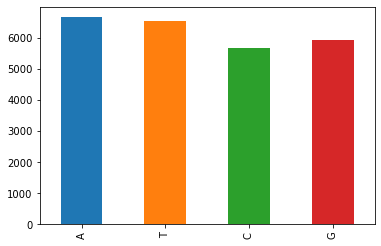

In [63]:
js1_mono_df[['A','T','C','G']].sum().plot.bar()

In [61]:
df = js1_bi.groupby('MSIstatus') \
    .agg('mean')
df.T

MSIstatus,MSI-H,MSS
AA+TT,10.282609,12.668874
AC+GT,10.239130,10.516556
AG+CT,15.836957,14.728477
AT+AT,9.804348,12.913907
CA+TG,15.793478,14.377483
CC+GG,12.119565,9.947020
CG+CG,2.913043,2.860927
GA+TC,12.184783,11.781457
GC+GC,12.086957,9.788079
TA+TA,7.804348,11.973510


###  two-tailed Mann Whitney U test 

In [64]:
import scipy.stats as stats

In [65]:
stat, pval = stats.mannwhitneyu(js1_mono_msi['A+T'], js1_mono_mss['A+T'])
print(stat,pval)

4709.0 1.2756099370991183e-05


In [66]:
df = js1_bi.groupby('MSIstatus') \
    .agg('mean').T
df.index

Index(['AA+TT', 'AC+GT', 'AG+CT', 'AT+AT', 'CA+TG', 'CC+GG', 'CG+CG', 'GA+TC',
       'GC+GC', 'TA+TA'],
      dtype='object')

In [67]:
mono_grouped = js1_mono.groupby('MSIstatus')
print(mono_grouped.size())
mono_grouped.groups

MSIstatus
MSI-H     92
MSS      151
dtype: int64


{'MSI-H': Index(['XRN:6SJTT7', 'XRN:AFAEVN', 'XRN:MPPMPA', 'XRN:30NP36', 'XRN:JPE87T',
        'XRN:XQRHSE', 'XRN:QVAKVU', 'XRN:QQXUME', 'XRN:1KPTFL', 'XRN:BJ8PSW',
        'XRN:F9ARJF', 'XRN:W6BMCA', 'XRN:S49FUX', 'XRN:9JPLTH', 'XRN:CLF17N',
        'XRN:B7E8A3', 'XRN:245RH8', 'XRN:J967F9', 'XRN:XYCJ93', 'XRN:2PVSC7',
        'XRN:X6J96S', 'XRN:2XSYVT', 'XRN:SLXMB3', 'XRN:AW746M', 'XRN:79DRDU',
        'XRN:0LPP0J', 'XRN:W01KL5', 'XRN:R1V1DT', 'XRN:QJ8FJ0', 'XRN:K19WRF',
        'XRN:JPEWCE', 'XRN:EAY8VA', 'XRN:9VM7TP', 'XRN:TBQ8K6', 'XRN:CJSFA7',
        'XRN:MSKV4V', 'XRN:VTH671', 'XRN:SV732Y', 'XRN:DVM2CN', 'XRN:NPCWVT',
        'XRN:FXUJJ4', 'XRN:FUEL2G', 'XRN:RBK7DF', 'XRN:5P9VQ6', 'XRN:DTP50X',
        'XRN:C7MP5D', 'XRN:HB5TCA', 'XRN:QQ2D5X', 'XRN:42UDWY', 'XRN:57B78K',
        'XRN:AVWPRE', 'XRN:6DV775', 'XRN:3ML9GP', 'XRN:VXJB0J', 'XRN:NSJRNL',
        'XRN:AA8WCL', 'XRN:GHG6TP', 'XRN:FH3GP5', 'XRN:BWHE0A', 'XRN:THRQJ0',
        'XRN:H4XLYD', 'XRN:1D8N0Q', 'XRN:MKSR16', 'XRN:

In [71]:
print(type(mono_grouped.get_group('MSI-H')))
mono_grouped.get_group('MSI-H').head()

<class 'pandas.core.frame.DataFrame'>


,A+T,C+G,MSIstatus
deidentifiedSpecimenName,,,
XRN:6SJTT7,62,39,MSI-H
XRN:AFAEVN,47,54,MSI-H
XRN:MPPMPA,49,52,MSI-H
XRN:30NP36,45,55,MSI-H
XRN:JPE87T,40,60,MSI-H


In [ ]:
def mean_mannwhitneyu(df):
    gb = df.groupby('MSIstatus')
    tmp = gb.agg('mean').T # compute mean
    tmp.rename(columns={"MSI-H":'MSI_mean',"MSS":'MSS_mean'}, inplace = True)
    msi = gb.get_group('MSI-H')
    mss = gb.get_group('MSS')
    p_list = []
    for i in tmp.index:
        stat, pval = stats.mannwhitneyu(msi[i], mss[i]) # compute p value
        p_list.append(pval)
    tmp['MW_2tailed_pval'] = p_list
    return tmp

In [12]:
mean_mannwhitneyu(js1_mono)

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,50.119565,56.185430,0.000013
C+G,50.554348,45.238411,0.000103


In [13]:
mean_mannwhitneyu(js1_bi)

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,10.282609,12.668874,0.000568
AC+GT,10.239130,10.516556,0.129782
AG+CT,15.836957,14.728477,0.008073
AT+AT,9.804348,12.913907,0.000121
CA+TG,15.793478,14.377483,0.007933
CC+GG,12.119565,9.947020,0.000148
CG+CG,2.913043,2.860927,0.127676
GA+TC,12.184783,11.781457,0.229843
GC+GC,12.086957,9.788079,0.000104
TA+TA,7.804348,11.973510,0.000014


### convert count to percentage

In [8]:
js1_mono_df.head()

,A,C,G,T,MSIstatus
deidentifiedSpecimenName,,,,,
XRN:6SJTT7,31,16,23,31,MSI-H
XRN:DNF6WD,36,24,18,24,MSS
XRN:AFAEVN,17,29,25,30,MSI-H
XRN:MPPMPA,18,30,22,31,MSI-H
XRN:30NP36,16,28,27,29,MSI-H


In [15]:
def combine_rc_percentage(dg):
    df = dg.copy()
    df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]/df['count']
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])/df['count']           
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt

In [21]:
combine_rc_percentage(js1_mono_df).head()

,A+T,C+G,MSIstatus,count
deidentifiedSpecimenName,,,,
XRN:6SJTT7,0.613861,0.386139,MSI-H,101
XRN:DNF6WD,0.588235,0.411765,MSS,102
XRN:AFAEVN,0.465347,0.534653,MSI-H,101
XRN:MPPMPA,0.485149,0.514851,MSI-H,101
XRN:30NP36,0.450000,0.550000,MSI-H,100


In [16]:
mean_mannwhitneyu(combine_rc_percentage(js1_mono_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,0.497697,0.553614,0.000034
C+G,0.502303,0.446386,0.000034
count,100.673913,101.423841,0.002238


In [17]:
mean_mannwhitneyu(combine_rc_percentage(js1_bi_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,0.111703,0.137886,0.001292
AC+GT,0.109746,0.112946,0.167662
AG+CT,0.170804,0.158470,0.004591
AT,0.053046,0.069833,0.000202
CA+TG,0.169639,0.154567,0.004565
CC+GG,0.130722,0.106906,0.000091
CG,0.015578,0.015289,0.178482
GA+TC,0.131340,0.126874,0.233524
GC,0.065105,0.052549,0.000057
TA,0.042317,0.064680,0.000027


### Check if JS2 has similar pattern

In [221]:
with open('Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()
df.head(3)

,deidentifiedSpecimenName,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
0,XRN:6SJTT7,colon adenocarcinoma (crc),MSI-H,RET,TRIM24,chr10:43611914,chr7:138268067,AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTT...,-,-,-
1,XRN:DNF6WD,colon adenocarcinoma (crc),MSS,BRAF,TRIM24,chr7:140489429,chr7:138253092,AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGC...,chr7:140489430,chr7:138253093,AAAAAAAAAAAAAAAAAAGGAGGCCAGGTACGGTGGCTTACGAGTT...
2,XRN:E3F52H,colon adenocarcinoma (crc),MSI ambiguous,RET,NCOA4,chr10:43611796,chr10:51587961,GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCG...,chr10:43607759,chr10:51587699,GCGATGGCACCGGTGGAAACGGGGTCCTGGGGCCCTGCCAGCCTGG...


In [5]:
def cound_mononucleotide(i):
    A_ct = i.count('A') + i.count('a')
    T_ct = i.count('T') + i.count('t')
    C_ct = i.count('C') + i.count('c')
    G_ct = i.count('G') + i.count('g')
    tmp = {'A':A_ct, 'T':T_ct, 'C':C_ct,'G':G_ct}
    return tmp
def count_mono_series(indexed):
    save = {}
    for i in range(len(indexed)):
        save[indexed.index[i]] = cound_mononucleotide(indexed[i])
    return save

def cound_binucleotide(str):
    list = ['A','T','C','G']
    tmp = {}
    for i in list:
        for j in list:
            key = i+j
            tmp[key] = str.count(key)
    return tmp
def count_bi_series(indexed):
    save = {}
    for i in range(len(indexed)):
        save[indexed.index[i]] = cound_binucleotide(indexed[i])
    return save

def my_referse_complement(seq):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return "".join(complement.get(base, base) for base in reversed(seq))


def combine_rc_percentage(dg):
    df = dg.copy()
    df['count'] = df.sum(axis=1)
    cols_rest = list(df.columns)
    cols_1 = []
    cols_2 = []
    for i in df.columns:
        reverse_tmp = my_referse_complement(i)
        if reverse_tmp in list(df.columns):
            cols_rest.remove(i)
            if reverse_tmp not in cols_1:
                cols_1.append(i)
                cols_2.append(reverse_tmp)   
    dt = pd.DataFrame()
    #cols_c = []
    for i,j in zip(cols_1,cols_2):
        if i==j:
            #cols_c.append(i)
            dt[i] = df[i]/df['count']
        else:
            k = i+"+"+j
            #cols_c.append(k)
            dt[k] = (df[i]+df[j])/df['count']           
    dt = pd.concat([dt, df[cols_rest]], axis=1)
    return dt


def mean_mannwhitneyu(df):
    gb = df.groupby('MSIstatus')
    tmp = gb.agg('mean').T # compute mean
    tmp.rename(columns={"MSI-H":'MSI_mean',"MSS":'MSS_mean'}, inplace = True)
    msi = gb.get_group('MSI-H')
    mss = gb.get_group('MSS')
    p_list = []
    for i in tmp.index:
        stat, pval = stats.mannwhitneyu(msi[i], mss[i]) # compute p value
        p_list.append(pval)
    tmp['MW_2tailed_pval'] = p_list
    return tmp


In [19]:
js2 = df[['Junction Sequence 2','MSIstatus']]
js2.index = df['deidentifiedSpecimenName']
js2 = js2[js2['MSIstatus']!='MSI ambiguous']
js2 = js2.drop(js2[js2['Junction Sequence 2'] == '-'].index)  #Drop rows containing with not JS2
print(js2.shape)
js2.head(3)

(92, 2)


,Junction Sequence 2,MSIstatus
deidentifiedSpecimenName,,
XRN:DNF6WD,AAAAAAAAAAAAAAAAAAGGAGGCCAGGTACGGTGGCTTACGAGTT...,MSS
XRN:AFAEVN,TACTTTCCAGTTGAGCATCCCAAATTCGAAAATCAGAAATTTATAC...,MSI-H
XRN:MPPMPA,TTCAGATTTGGGTTCTCAGCCTGTATAGTGTTTGTCAATGGTGAAC...,MSI-H


In [29]:
values, counts = np.unique(js2.MSIstatus, return_counts=True)
dict(zip(values, counts))

{'MSI-H': 47, 'MSS': 45}

In [21]:
js2_mono_count = count_mono_series(js2.iloc[:,0])
js2_mono_df = pd.concat([pd.DataFrame(js2_mono_count).T, js2['MSIstatus']], axis=1)
js2_mono_df = js2_mono_df[js2_mono_df['MSIstatus']!='MSI ambiguous']
print(js2_mono_df.shape)
js2_mono_df.head()

(92, 5)


,A,C,G,T,MSIstatus
deidentifiedSpecimenName,,,,,
XRN:DNF6WD,49,7,22,22,MSS
XRN:AFAEVN,22,29,23,26,MSI-H
XRN:MPPMPA,18,22,29,31,MSI-H
XRN:XQRHSE,30,36,20,15,MSI-H
XRN:1KPTFL,18,34,23,26,MSI-H


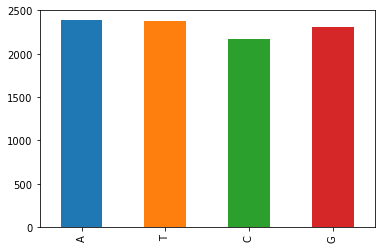

In [22]:
js2_mono_df[['A','T','C','G']].sum().plot.bar()

In [24]:
js2_bi_count = count_bi_series(js2.iloc[:,0])
js2_bi_df = pd.concat([pd.DataFrame(js2_bi_count).T, js2['MSIstatus']], axis=1)
js2_bi_df = js2_bi_df[js2_bi_df['MSIstatus']!='MSI ambiguous']
js2_bi = combine_rc_table(js2_bi_df)
js2_bi.head()

,AA+TT,AC+GT,AG+CT,AT+AT,CA+TG,CC+GG,CG+CG,GA+TC,GC+GC,TA+TA,MSIstatus
deidentifiedSpecimenName,,,,,,,,,,,
XRN:DNF6WD,25,8,10,16,7,8,4,7,6,18,MSS
XRN:AFAEVN,9,10,13,10,15,12,8,12,14,6,MSI-H
XRN:MPPMPA,8,16,11,10,22,10,6,9,14,6,MSI-H
XRN:XQRHSE,8,16,13,4,19,12,8,3,20,10,MSI-H
XRN:1KPTFL,9,9,19,6,16,12,2,12,18,6,MSI-H


In [25]:
mean_mannwhitneyu(combine_rc_percentage(js2_mono_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,0.495492,0.537009,0.039401
C+G,0.504508,0.462991,0.039401
count,100.042553,100.844444,0.291161


In [26]:
mean_mannwhitneyu(combine_rc_percentage(js2_bi_df))

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,0.107719,0.133717,0.014505
AC+GT,0.111166,0.105962,0.096015
AG+CT,0.160807,0.160733,0.479751
AT,0.058390,0.065021,0.137057
CA+TG,0.172603,0.156288,0.017281
CC+GG,0.126481,0.122731,0.312696
CG,0.022283,0.015500,0.087078
GA+TC,0.128649,0.122231,0.199422
GC,0.068234,0.059183,0.056390
TA,0.043667,0.058634,0.023613


# Hypothesis4

### Fisher's exact test on one or two junctions count in MSI and MSS

In [4]:
with open('Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()
df.set_index('deidentifiedSpecimenName', inplace = True)
df.head(3)

,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
deidentifiedSpecimenName,,,,,,,,,,
XRN:6SJTT7,colon adenocarcinoma (crc),MSI-H,RET,TRIM24,chr10:43611914,chr7:138268067,AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTT...,-,-,-
XRN:DNF6WD,colon adenocarcinoma (crc),MSS,BRAF,TRIM24,chr7:140489429,chr7:138253092,AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGC...,chr7:140489430,chr7:138253093,AAAAAAAAAAAAAAAAAAGGAGGCCAGGTACGGTGGCTTACGAGTT...
XRN:E3F52H,colon adenocarcinoma (crc),MSI ambiguous,RET,NCOA4,chr10:43611796,chr10:51587961,GGGCAGGGGTCAGGGGAGACAGTAGACCAGGAACCAGAGAGGGTCG...,chr10:43607759,chr10:51587699,GCGATGGCACCGGTGGAAACGGGGTCCTGGGGCCCTGCCAGCCTGG...


In [28]:
A= len(df.query("MSIstatus == 'MSI-H'& Gene1_Breakpoint2 != '-'")) # MSI with 2 JSs
B= len(df.query("MSIstatus == 'MSS'& Gene1_Breakpoint2 != '-'")) # MSS with 2 JSs
C= len(df.query("MSIstatus == 'MSI-H'& Gene1_Breakpoint2 == '-'")) # MSI with 1 JSs
D= len(df.query("MSIstatus == 'MSS'& Gene1_Breakpoint2 == '-'")) # MSS with 1 JSs
[[A,B], [C,D]] # contingency table

[[47, 45], [45, 106]]

In [30]:
#df.query("MSIstatus == 'MSI-H'& Gene1_Breakpoint2 != '-'")

In [21]:
fisher = pd.DataFrame([[A,B], [C,D]], columns= ['MSI', 'MSS'], index= ['2_JS','1_JS'])
fisher

,MSI,MSS
2_JS,47,45
1_JS,45,106


In [26]:
#oddsratio, pvalue = stats.fisher_exact([[A,B], [C,D]])
oddsratio, pvalue = stats.fisher_exact(fisher, alternative='two-sided')
print("oddsratio: {} | pvalue: {}".format(oddsratio, pvalue))

oddsratio: 2.4602469135802467 | pvalue: 0.001081025372424202


# Hypothesis5

### Compute the distance between break sites. 比较 F-G 和 I-J

In [45]:
# int('chr10:43611914') 不行
t = 'chr10:43611914'
int(t[t.find(":")+1:])

43611914

In [43]:
with open('Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()
df.set_index('deidentifiedSpecimenName', inplace = True)
df.head(3)

sub_df = df[df.MSIstatus != 'MSI ambiguous']# get rid of 'MSI ambiguous'
sub_df = sub_df[sub_df.Gene2_Breakpoint2 != '-']# select gene pairs having both JS1 and JS2
sub_df.drop(columns = ["diseaseOntology","Junction Sequence 1","Junction Sequence 2"], inplace = True) # drop sequence
sub_df.head(3)
#sub_df.shape

,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Gene1_Breakpoint2,Gene2_Breakpoint2
deidentifiedSpecimenName,,,,,,,
XRN:DNF6WD,MSS,BRAF,TRIM24,chr7:140489429,chr7:138253092,chr7:140489430,chr7:138253093
XRN:AFAEVN,MSI-H,NTRK1,TPM3,chr1:156843346,chr1:154133546,chr1:156843348,chr1:154133545
XRN:MPPMPA,MSI-H,NTRK1,TPM3,chr1:156843424,chr1:154133209,chr1:156843433,chr1:154133210


In [44]:
sub_df[['G1_Ch','G1_BP1']] = sub_df.Gene1_Breakpoint1.str.split(':', expand=True) #Vectorized string functions for Series and Index
sub_df[['G1_Ch2','G1_BP2']] = sub_df.Gene1_Breakpoint2.str.split(':', expand=True)
sub_df[['G2_Ch','G2_BP1']] = sub_df.Gene2_Breakpoint1.str.split(':', expand=True)
sub_df[['G2_Ch2','G2_BP2']] = sub_df.Gene2_Breakpoint2.str.split(':', expand=True)
sub_df.drop(columns = ["Gene1_Breakpoint1","Gene1_Breakpoint2","Gene2_Breakpoint1","Gene2_Breakpoint2"], inplace = True)
sub_df.head(3)

,MSIstatus,gene1_RE,gene2_RE,G1_Ch,G1_BP1,G1_Ch2,G1_BP2,G2_Ch,G2_BP1,G2_Ch2,G2_BP2
deidentifiedSpecimenName,,,,,,,,,,,
XRN:DNF6WD,MSS,BRAF,TRIM24,chr7,140489429,chr7,140489430,chr7,138253092,chr7,138253093
XRN:AFAEVN,MSI-H,NTRK1,TPM3,chr1,156843346,chr1,156843348,chr1,154133546,chr1,154133545
XRN:MPPMPA,MSI-H,NTRK1,TPM3,chr1,156843424,chr1,156843433,chr1,154133209,chr1,154133210


In [45]:
sub_df = sub_df[(sub_df.G1_Ch == sub_df.G1_Ch2) & (sub_df.G2_Ch == sub_df.G2_Ch2)] # filter out records with unmatched chromosome
sub_df['G1_ΔBP'] = abs(sub_df['G1_BP2'].astype(int) - sub_df['G1_BP1'].astype(int)) # convert string to int
sub_df['G2_ΔBP'] = abs(sub_df['G2_BP2'].astype(int) - sub_df['G2_BP1'].astype(int)) # consider without sign
sub_df.head()

,MSIstatus,gene1_RE,gene2_RE,G1_Ch,G1_BP1,G1_Ch2,G1_BP2,G2_Ch,G2_BP1,G2_Ch2,G2_BP2,G1_ΔBP,G2_ΔBP
deidentifiedSpecimenName,,,,,,,,,,,,,
XRN:DNF6WD,MSS,BRAF,TRIM24,chr7,140489429,chr7,140489430,chr7,138253092,chr7,138253093,1,1
XRN:AFAEVN,MSI-H,NTRK1,TPM3,chr1,156843346,chr1,156843348,chr1,154133546,chr1,154133545,2,1
XRN:MPPMPA,MSI-H,NTRK1,TPM3,chr1,156843424,chr1,156843433,chr1,154133209,chr1,154133210,9,1
XRN:XQRHSE,MSI-H,NTRK1,TPM3,chr1,156843667,chr1,156843672,chr1,154141508,chr1,154141501,5,7
XRN:1KPTFL,MSI-H,NTRK1,TPM3,chr1,156843800,chr1,156843804,chr1,154130819,chr1,154130813,4,6


In [50]:
sub_df[sub_df.G1_ΔBP ==0]

,MSIstatus,gene1_RE,gene2_RE,G1_Ch,G1_BP1,G1_Ch2,G1_BP2,G2_Ch,G2_BP1,G2_Ch2,G2_BP2,G1_ΔBP,G2_ΔBP
deidentifiedSpecimenName,,,,,,,,,,,,,
XRN:2PVSC7,MSI-H,NTRK1,TPM3,chr1,156844094,chr1,156844094,chr1,154131880,chr1,154131882,0,2
XRN:QQ2D5X,MSI-H,RET,NCOA4,chr10,43610417,chr10,43610417,chr10,51587071,chr10,51587073,0,2
XRN:VKLN7D,MSI-H,NTRK3,ETV6,chr15,88509783,chr15,88509783,chr12,12030400,chr12,12030404,0,4
XRN:YEEKB3,MSI-H,BRAF,TRIM24,chr7,140490030,chr7,140490030,chr7,138220729,chr7,138220730,0,1
XRN:DLU61G,MSI-H,BRAF,TRIM24,chr7,140490799,chr7,140490799,chr7,138255242,chr7,138255241,0,1
XRN:NR9J8U,MSS,NTRK1,TPM3,chr1,156844253,chr1,156844253,chr1,154133379,chr1,154133381,0,2
XRN:6SR1AR,MSS,RET,NCOA4,chr10,43611116,chr10,43611116,chr10,51587473,chr10,51587468,0,5
XRN:XH8KQB,MSS,RET,NCOA4,chr10,43611896,chr10,43611896,chr10,51588473,chr10,51588470,0,3
XRN:6E0D11,MSS,ALK,EML4,chr2,29446554,chr2,29446554,chr2,42554900,chr2,42554899,0,1


In [46]:
sub_df.to_csv("BreakPointDistance.csv")

In [80]:
sub_df.groupby('MSIstatus').count()

,gene1_RE,gene2_RE,G1_Ch,G1_BP1,G1_Ch2,G1_BP2,G2_Ch,G2_BP1,G2_Ch2,G2_BP2,G1_ΔBP,G2_ΔBP
MSIstatus,,,,,,,,,,,,
MSI-H,47,47,47,47,47,47,47,47,47,47,47,47
MSS,42,42,42,42,42,42,42,42,42,42,42,42


In [52]:
dt_count = sub_df.groupby('MSIstatus')\
    .agg({"gene2_RE":'count'})\
    .rename(columns = {"gene2_RE":'count'})
dt_min = sub_df.groupby('MSIstatus') \
    .agg({"G1_ΔBP":'min',"G2_ΔBP":'min'})\
    .rename(columns={'G1_ΔBP':'G1_ΔBP min','G2_ΔBP':'G2_ΔBP min'})#.reset_index()
dt_max = sub_df.groupby('MSIstatus') \
    .agg({"G1_ΔBP":'max',"G2_ΔBP":'max'})\
    .rename(columns={'G1_ΔBP':'G1_ΔBP max','G2_ΔBP':'G2_ΔBP max'})#.reset_index()
pd.concat([dt_count, dt_min, dt_max], axis=1, sort=False).T

MSIstatus,MSI-H,MSS
count,47,42
G1_ΔBP min,0,0
G2_ΔBP min,0,0
G1_ΔBP max,7999,3348
G2_ΔBP max,8782,585


ΔBP in range between 0 and 8782


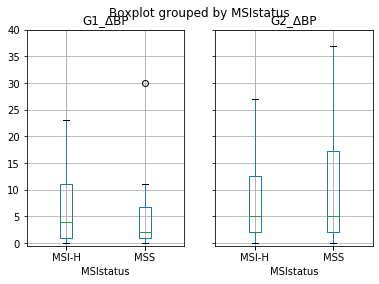

In [59]:
ymin, ymax = min(min(sub_df.G1_ΔBP),min(sub_df.G2_ΔBP)), max(max(sub_df.G1_ΔBP),max(sub_df.G2_ΔBP))
print("ΔBP in range between {} and {}".format(ymin, ymax))

fig, ax = sub_df.boxplot(column = ['G1_ΔBP','G2_ΔBP'], by = 'MSIstatus')
#ax.set_yscale('log')
plt.ylim(-0.5, 40)
plt.show()


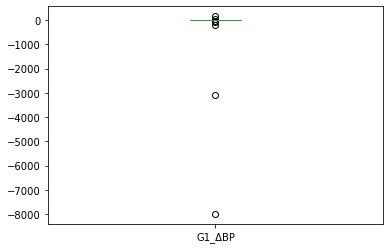

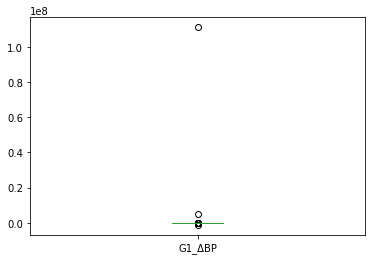

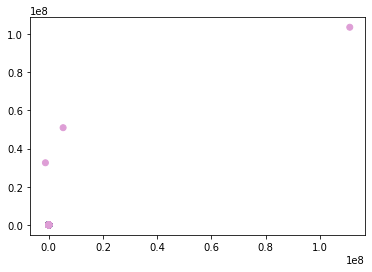

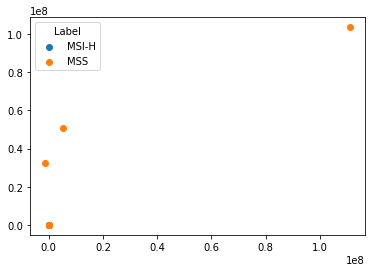

In [79]:
sub_df.groupby('MSIstatus').plot('G2_ΔBP', kind='box')

fig, ax = plt.subplots()
ax.scatter(sub_df.G1_ΔBP, sub_df.G2_ΔBP, c = pd.Categorical(sub_df.MSIstatus).codes, cmap='tab20b')
plt.show()

fig, ax = plt.subplots()
for n, grp in sub_df.groupby('MSIstatus'):
    ax.scatter(x = "G1_ΔBP", y = "G2_ΔBP", data=grp, label=n)
ax.legend(title="Label")
plt.show()

###  two-tailed Mann Whitney U test 

In [82]:
sub_gb = sub_df.groupby('MSIstatus')
tmp = sub_gb.agg('mean').T.rename(columns={"MSI-H":'MSI_mean',"MSS":'MSS_mean'},)
tmp

MSIstatus,MSI_mean,MSS_mean
G1_ΔBP,249.851064,367.071429
G2_ΔBP,241.234043,51.928571


In [84]:
def mean_mannwhitneyu(df):
    gb = df.groupby('MSIstatus')
    tmp = gb.agg('mean').T # compute mean
    tmp.rename(columns={"MSI-H":'MSI_mean',"MSS":'MSS_mean'}, inplace = True)
    msi = gb.get_group('MSI-H')
    mss = gb.get_group('MSS')
    p_list = []
    for i in tmp.index:
        stat, pval = stats.mannwhitneyu(msi[i], mss[i]) # compute p value
        p_list.append(pval)
    tmp['MW_2tailed_pval'] = p_list
    return tmp

In [85]:
mean_mannwhitneyu(sub_df)

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
G1_ΔBP,249.851064,367.071429,0.247109
G2_ΔBP,241.234043,51.928571,0.431199


# Hypothesis6

### Check partners of NTRK1

In [30]:
with open('Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()

dfd = df[df['MSIstatus']!='MSI ambiguous'] # Drop 'MSI ambiguous'
NTRK1_CRC = dfd[dfd.gene1_RE == 'NTRK1']
print(NTRK1_CRC.shape)
NTRK1_CRC.head(3)

(45, 11)


,deidentifiedSpecimenName,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
4,XRN:AFAEVN,colon adenocarcinoma (crc),MSI-H,NTRK1,TPM3,chr1:156843346,chr1:154133546,GACCTGTTTCTCCCAGGCCTGCCCTTTGATTTCGGGTTCTACTCGC...,chr1:156843348,chr1:154133545,TACTTTCCAGTTGAGCATCCCAAATTCGAAAATCAGAAATTTATAC...
5,XRN:MPPMPA,colon adenocarcinoma (crc),MSI-H,NTRK1,TPM3,chr1:156843424,chr1:154133209,CTCCCTCCAGCTGCGCCCTGACCTCCTGCTGTTGCTCTTTCTGGCC...,chr1:156843433,chr1:154133210,TTCAGATTTGGGTTCTCAGCCTGTATAGTGTTTGTCAATGGTGAAC...
6,XRN:30NP36,colon adenocarcinoma (crc),MSI-H,NTRK1,TPM3,chr1:156843471,chr1:154132639,GAGTATACCAGGAAGAGTTTGGTTTTCCTGTCCCCAAAGTTGTATT...,-,-,-


In [31]:
values, counts = np.unique(NTRK1_CRC.gene2_RE, return_counts=True) # count Gene2 items
pd.DataFrame([values, counts], index=['gene2_RE','count']).T.sort_values('count', ascending=False)

,gene2_RE,count
5,TPM3,23
2,LMNA,11
6,TPR,5
3,PLEKHA6,3
0,CCDC88C,1
1,IRF2BP2,1
4,TPM1,1


In [32]:
NTRK1_CRC_js1 = NTRK1_CRC[['Junction Sequence 1','MSIstatus']]
NTRK1_CRC_js1.index = NTRK1_CRC['deidentifiedSpecimenName']
NTRK1_CRC_js2 = NTRK1_CRC[['Junction Sequence 2','MSIstatus']]
NTRK1_CRC_js2.index = NTRK1_CRC['deidentifiedSpecimenName']
NTRK1_CRC_js2 = NTRK1_CRC_js2.drop(NTRK1_CRC_js2[NTRK1_CRC_js2['Junction Sequence 2'] == '-'].index)  #Drop rows containing with not JS2

In [41]:
values, counts = np.unique(NTRK1_CRC_js1.MSIstatus, return_counts=True)
dict(zip(values, counts))

{'MSI-H': 39, 'MSS': 6}

In [42]:
values, counts = np.unique(NTRK1_CRC_js2.MSIstatus, return_counts=True)
dict(zip(values, counts))

{'MSI-H': 17, 'MSS': 4}

In [33]:
NTRK1_CRC_js1_mono_count = count_mono_series(NTRK1_CRC_js1.iloc[:,0])
NTRK1_CRC_js1_mono_df = pd.concat([pd.DataFrame(NTRK1_CRC_js1_mono_count).T, NTRK1_CRC_js1['MSIstatus']], axis=1)
#NTRK1_CRC_js1_mono_df.head()
NTRK1_CRC_js1_mono_p = combine_rc_table_percentage(NTRK1_CRC_js1_mono_df)
print(NTRK1_CRC_js1_mono_p.shape)
NTRK1_CRC_js1_mono_p.head()

(45, 4)


,A+T,C+G,MSIstatus,JS_len
deidentifiedSpecimenName,,,,
XRN:AFAEVN,0.465347,0.534653,MSI-H,101
XRN:MPPMPA,0.485149,0.514851,MSI-H,101
XRN:30NP36,0.450000,0.550000,MSI-H,100
XRN:JPE87T,0.400000,0.600000,MSI-H,100
XRN:XQRHSE,0.390000,0.610000,MSI-H,100


In [34]:
NTRK1_CRC_js1_bi_count = count_bi_series(NTRK1_CRC_js1.iloc[:,0])
NTRK1_CRC_js1_bi_df = pd.concat([pd.DataFrame(NTRK1_CRC_js1_bi_count).T, NTRK1_CRC_js1['MSIstatus']], axis=1)
NTRK1_CRC_js1_bi_p = combine_rc_table_percentage(NTRK1_CRC_js1_bi_df)
NTRK1_CRC_js1_bi_p.head()

,AA+TT,AC+GT,AG+CT,AT+AT,CA+TG,CC+GG,CG+CG,GA+TC,GC+GC,TA+TA,MSIstatus,JS_len
deidentifiedSpecimenName,,,,,,,,,,,,
XRN:AFAEVN,0.086022,0.096774,0.182796,0.086022,0.161290,0.129032,0.064516,0.129032,0.193548,0.086022,MSI-H,93
XRN:MPPMPA,0.073684,0.136842,0.200000,0.084211,0.189474,0.105263,0.021053,0.136842,0.126316,0.084211,MSI-H,95
XRN:30NP36,0.086022,0.118280,0.139785,0.107527,0.150538,0.161290,0.086022,0.129032,0.150538,0.086022,MSI-H,93
XRN:JPE87T,0.072165,0.061856,0.175258,0.082474,0.195876,0.185567,0.041237,0.144330,0.206186,0.000000,MSI-H,97
XRN:XQRHSE,0.061224,0.102041,0.122449,0.102041,0.193878,0.224490,0.061224,0.142857,0.142857,0.000000,MSI-H,98


In [35]:
NTRK1_CRC_js2_mono_count = count_mono_series(NTRK1_CRC_js2.iloc[:,0])
NTRK1_CRC_js2_mono_df = pd.concat([pd.DataFrame(NTRK1_CRC_js2_mono_count).T, NTRK1_CRC_js2['MSIstatus']], axis=1)
#NTRK1_CRC_js2_mono_df.head()
NTRK1_CRC_js2_mono_p = combine_rc_table_percentage(NTRK1_CRC_js2_mono_df)
print(NTRK1_CRC_js2_mono_p.shape)
NTRK1_CRC_js2_mono_p.head()

(21, 4)


,A+T,C+G,MSIstatus,JS_len
deidentifiedSpecimenName,,,,
XRN:AFAEVN,0.480000,0.520000,MSI-H,100
XRN:MPPMPA,0.490000,0.510000,MSI-H,100
XRN:XQRHSE,0.445545,0.554455,MSI-H,101
XRN:1KPTFL,0.435644,0.564356,MSI-H,101
XRN:F9ARJF,0.560000,0.440000,MSI-H,100


In [36]:
NTRK1_CRC_js2_bi_count = count_bi_series(NTRK1_CRC_js2.iloc[:,0])
NTRK1_CRC_js2_bi_df = pd.concat([pd.DataFrame(NTRK1_CRC_js2_bi_count).T, NTRK1_CRC_js2['MSIstatus']], axis=1)
NTRK1_CRC_js2_bi_p = combine_rc_table_percentage(NTRK1_CRC_js2_bi_df)
NTRK1_CRC_js2_bi_p.head()

,AA+TT,AC+GT,AG+CT,AT+AT,CA+TG,CC+GG,CG+CG,GA+TC,GC+GC,TA+TA,MSIstatus,JS_len
deidentifiedSpecimenName,,,,,,,,,,,,
XRN:AFAEVN,0.100000,0.111111,0.144444,0.111111,0.166667,0.133333,0.088889,0.133333,0.155556,0.066667,MSI-H,90
XRN:MPPMPA,0.085106,0.170213,0.117021,0.106383,0.234043,0.106383,0.063830,0.095745,0.148936,0.063830,MSI-H,94
XRN:XQRHSE,0.086957,0.173913,0.141304,0.043478,0.206522,0.130435,0.086957,0.032609,0.217391,0.108696,MSI-H,92
XRN:1KPTFL,0.096774,0.096774,0.204301,0.064516,0.172043,0.129032,0.021505,0.129032,0.193548,0.064516,MSI-H,93
XRN:F9ARJF,0.175824,0.098901,0.131868,0.131868,0.153846,0.131868,0.043956,0.131868,0.087912,0.087912,MSI-H,91


In [37]:
mean_mannwhitneyu(NTRK1_CRC_js1_mono_p)

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,0.460412,0.492507,0.114573
C+G,0.539588,0.507493,0.114573
JS_len,101.179487,101.166667,0.078806


In [38]:
mean_mannwhitneyu(NTRK1_CRC_js2_bi_p)

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,0.096774,0.084315,0.265284
AC+GT,0.104007,0.121604,0.236626
AG+CT,0.167836,0.179394,0.250882
AT+AT,0.092176,0.082015,0.311150
CA+TG,0.169000,0.173481,0.310640
CC+GG,0.141014,0.138917,0.411415
CG+CG,0.060724,0.043599,0.279784
GA+TC,0.141032,0.144470,0.482129
GC+GC,0.151226,0.130455,0.223171
TA+TA,0.056546,0.059567,0.393850


In [39]:
mean_mannwhitneyu(NTRK1_CRC_js2_mono_p)

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
A+T,0.457841,0.45146,0.482123
C+G,0.542159,0.54854,0.482123
JS_len,100.588235,100.25000,0.384325


In [40]:
mean_mannwhitneyu(NTRK1_CRC_js2_bi_p)

MSIstatus,MSI_mean,MSS_mean,MW_2tailed_pval
AA+TT,0.096774,0.084315,0.265284
AC+GT,0.104007,0.121604,0.236626
AG+CT,0.167836,0.179394,0.250882
AT+AT,0.092176,0.082015,0.311150
CA+TG,0.169000,0.173481,0.310640
CC+GG,0.141014,0.138917,0.411415
CG+CG,0.060724,0.043599,0.279784
GA+TC,0.141032,0.144470,0.482129
GC+GC,0.151226,0.130455,0.223171
TA+TA,0.056546,0.059567,0.393850


# Hypothesis7

# Hypothesis8

# Hypothesis9